In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 读取图像
image = cv2.imread('sails.png', cv2.IMREAD_GRAYSCALE)

In [2]:
# 计算Harris角点
def harris_detector(img, k=0.04, window_size=3, threshold=0.01):
    # 计算图像的梯度
    dx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
    dy = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)

    # 计算Harris矩阵的三个分量
    Ixx = cv2.GaussianBlur(dx**2, (window_size, window_size), 0)
    Iyy = cv2.GaussianBlur(dy**2, (window_size, window_size), 0)
    Ixy = cv2.GaussianBlur(dx * dy, (window_size, window_size), 0)

    # 计算Harris响应函数
    det = Ixx * Iyy - Ixy**2
    trace = Ixx + Iyy
    harris_response = det - k * trace**2

    # 根据阈值选择角点
    corners = np.where(harris_response > threshold * harris_response.max())

    return corners

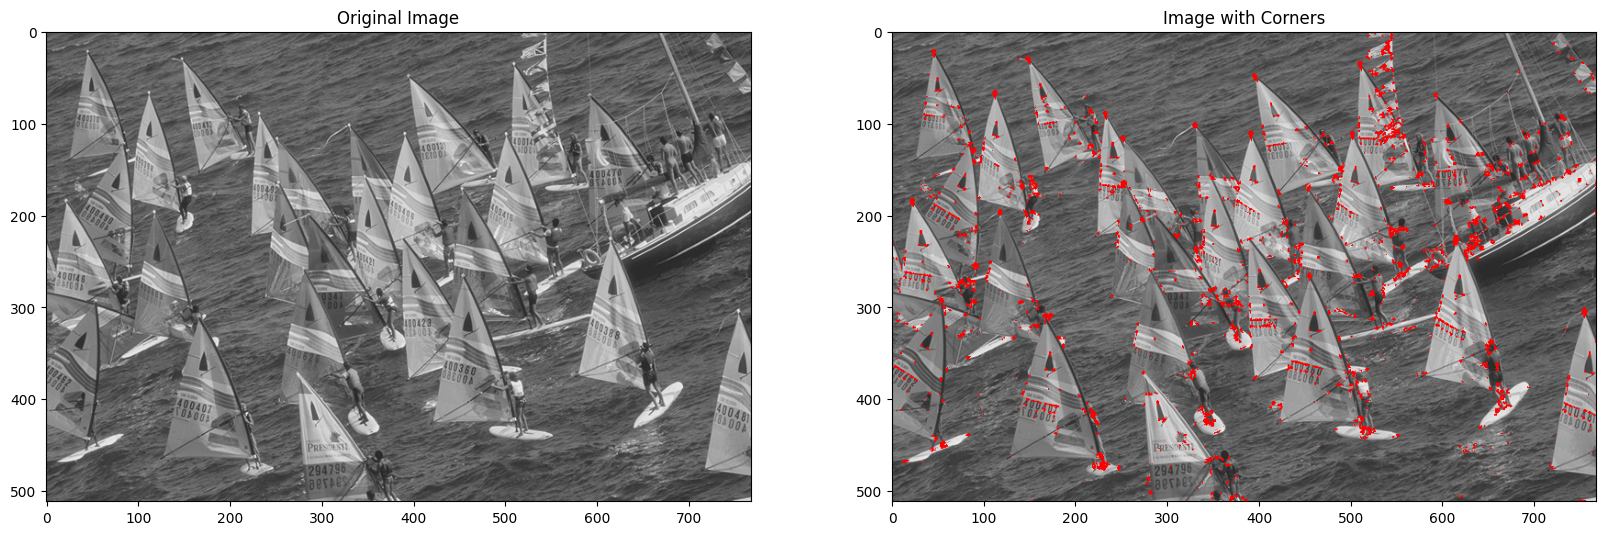

In [5]:

# 使用Harris角点检测器
corners = harris_detector(image)

# 在图像上标记角点
image_with_corners = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
image_with_corners[corners] = [0, 0, 255]  # Mark corners in red

# 显示原始图像和标记了角点的图像
plt.figure(figsize=(20, 10))
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Original Image')
plt.subplot(122), plt.imshow(cv2.cvtColor(image_with_corners, cv2.COLOR_BGR2RGB)), plt.title('Image with Corners')
plt.show()